In [1]:
from PIL import Image # for image resizing
from torch import cuda #primarily to clear cache after each iteration
from infer import InferenceHelper #AdaBins model
from matplotlib import pyplot as plt #for showing and sving predicted_depth array as a depth map
import numpy as np   #for np.squeeze(), reading and writing ndarrays into text files
import os      #for looping over all images in the Data folder

infer_helper = InferenceHelper(dataset='nyu')

Loading base model ()...

Using cache found in C:\Users\Nitish Jaiswal/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


Loop over all images in a directory, infer.py is bugged for predicting depth for a directory of images

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


<ipython-input-6-96056e3864d4>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(predicted_depth.squeeze())


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


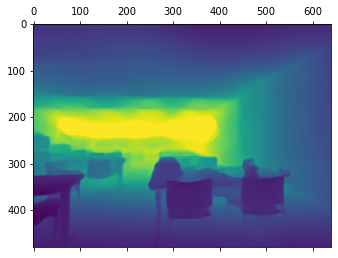

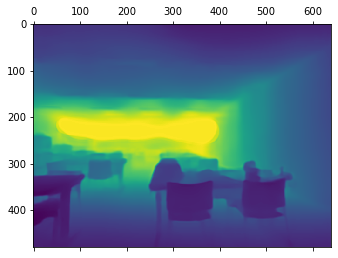

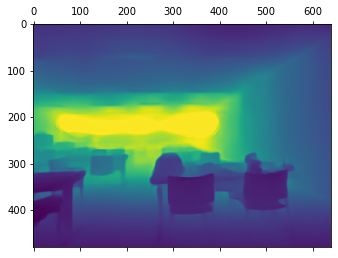

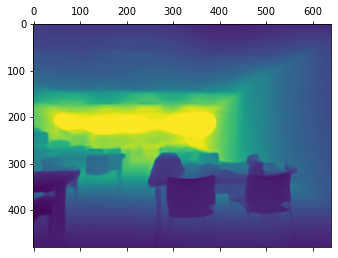

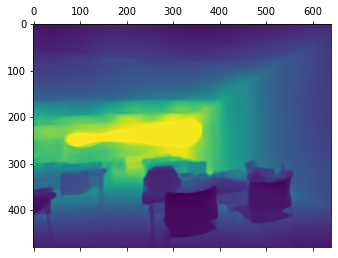

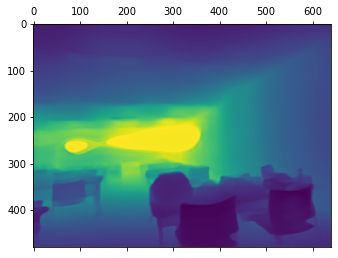

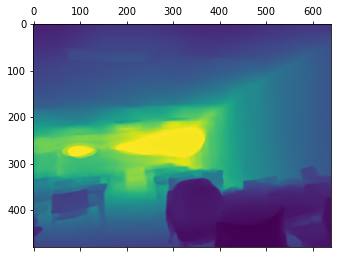

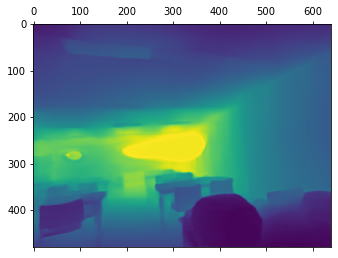

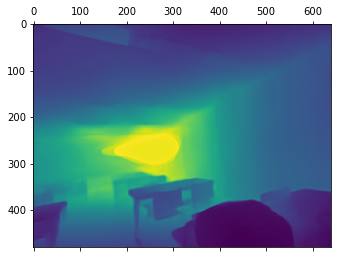

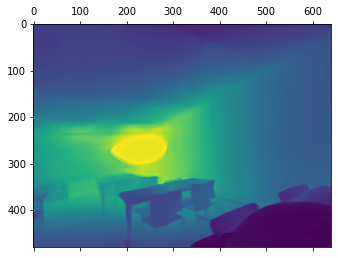

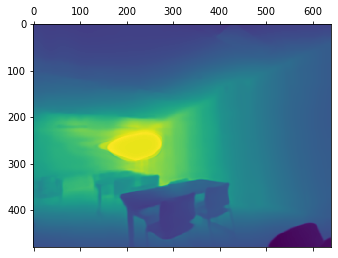

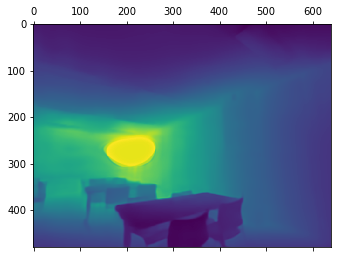

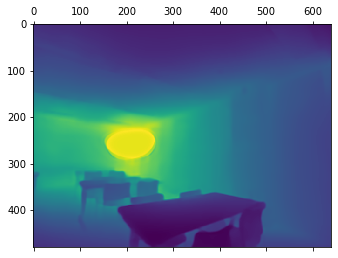

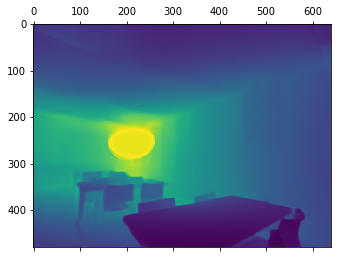

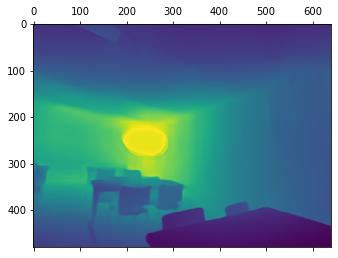

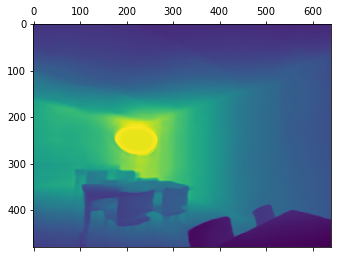

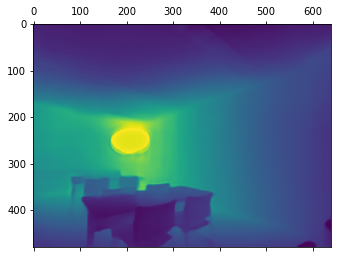

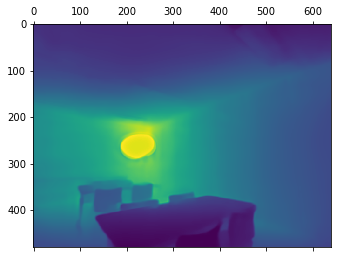

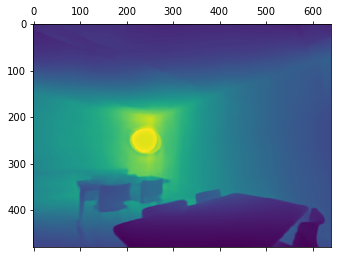

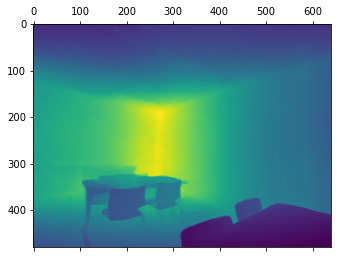

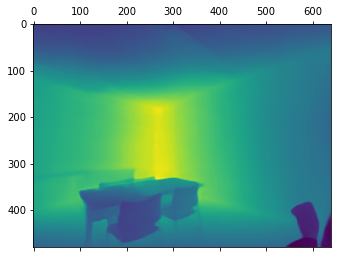

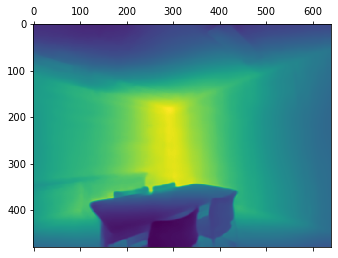

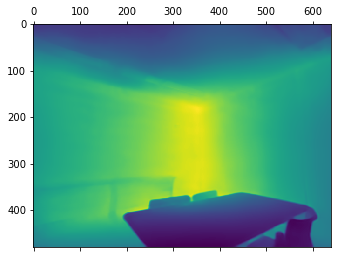

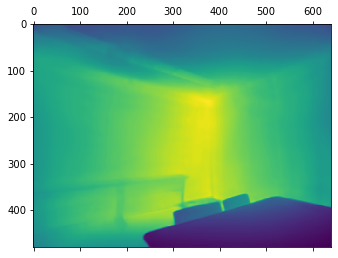

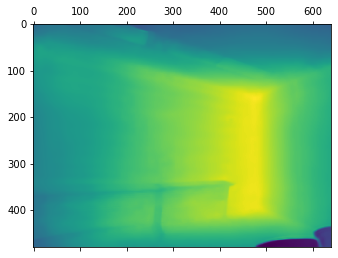

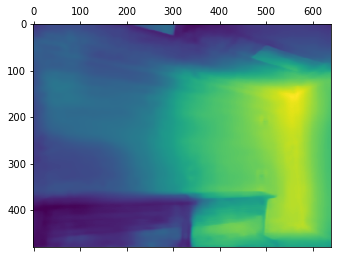

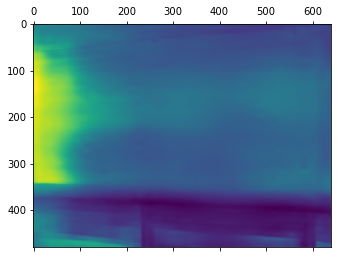

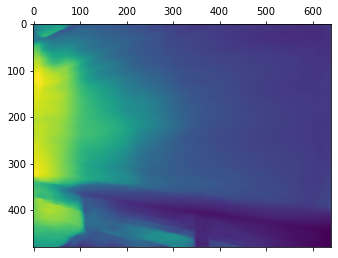

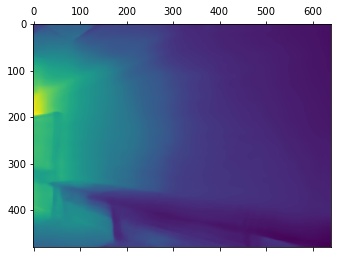

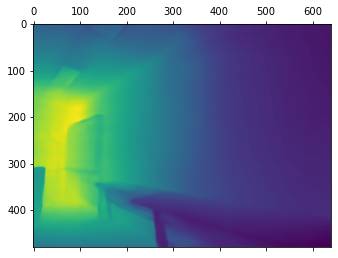

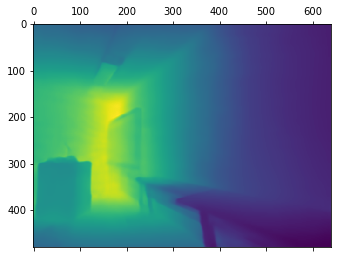

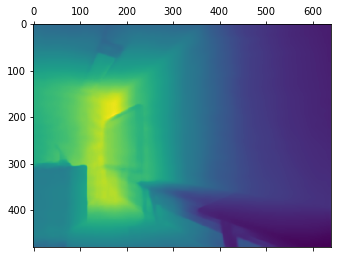

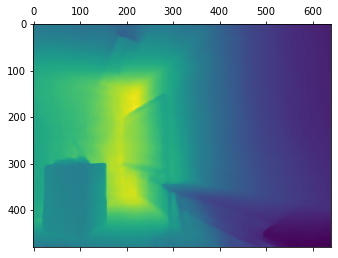

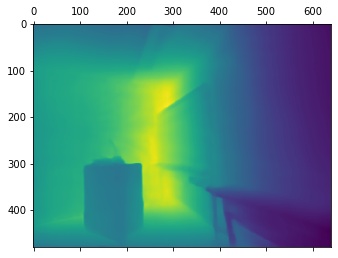

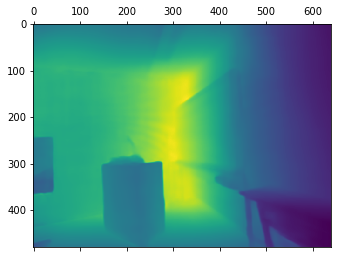

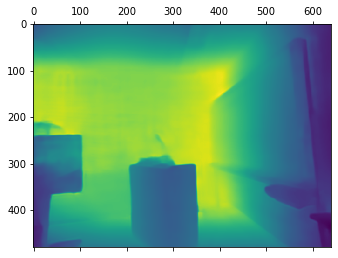

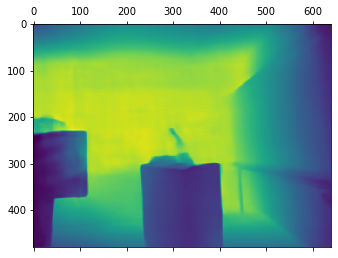

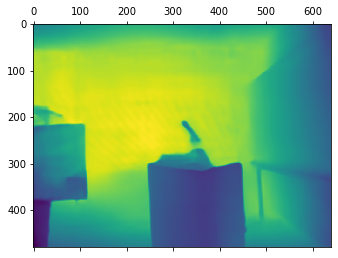

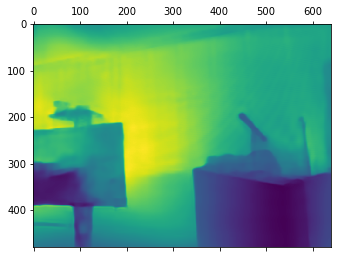

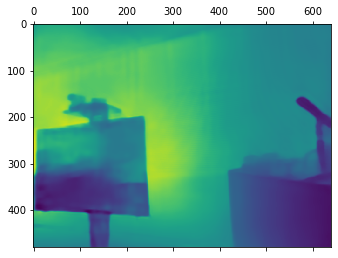

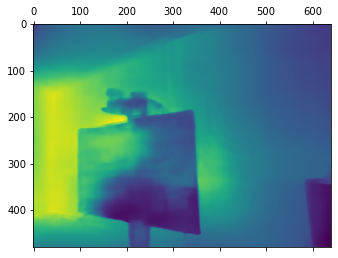

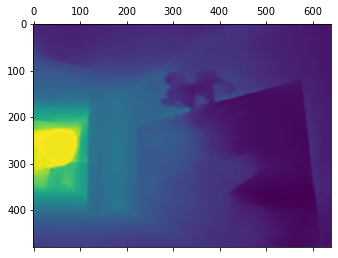

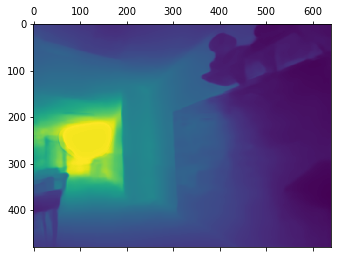

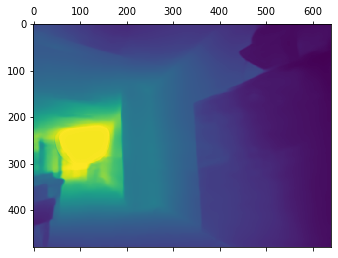

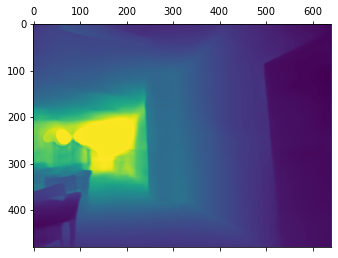

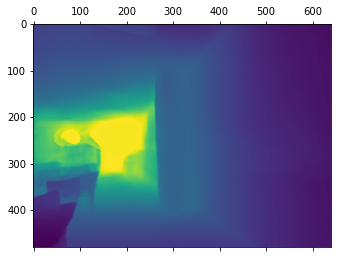

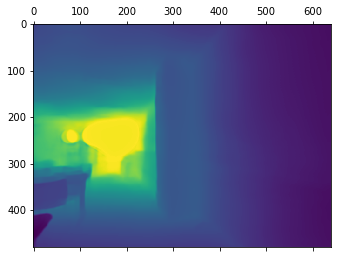

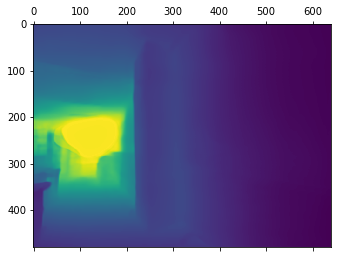

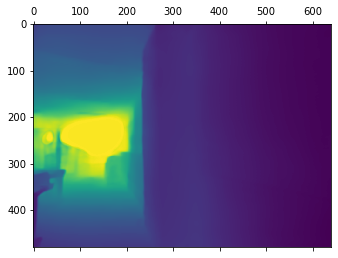

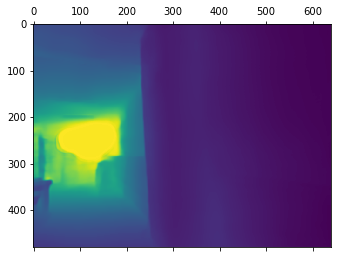

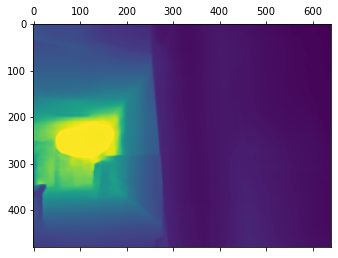

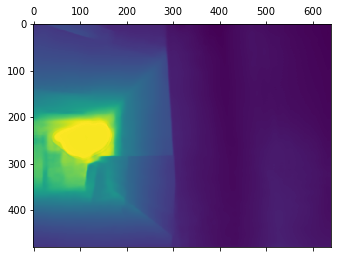

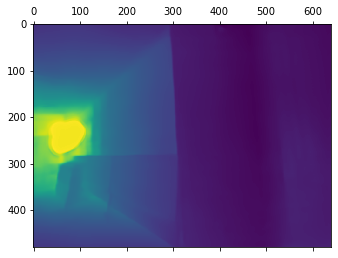

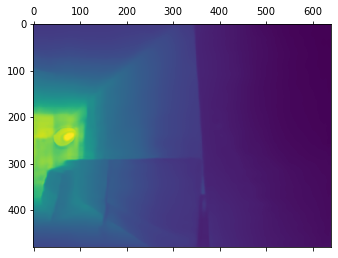

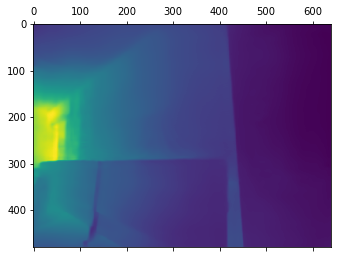

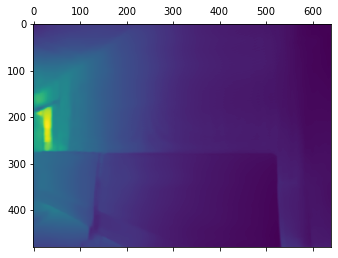

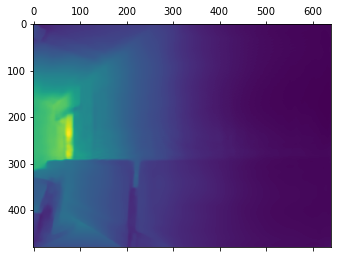

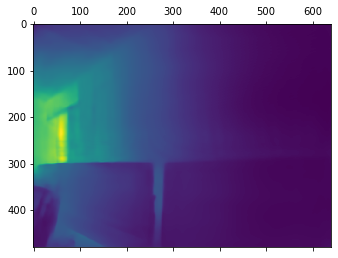

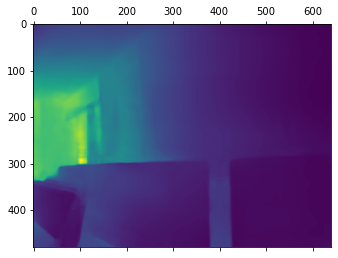

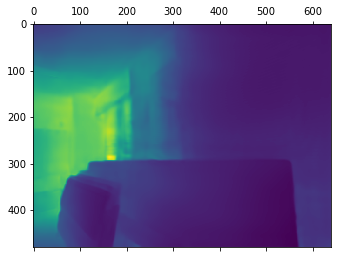

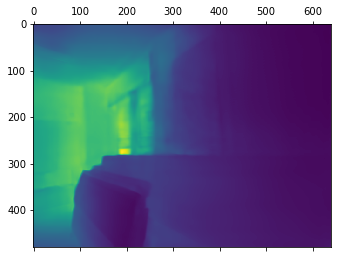

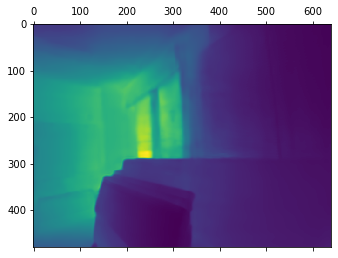

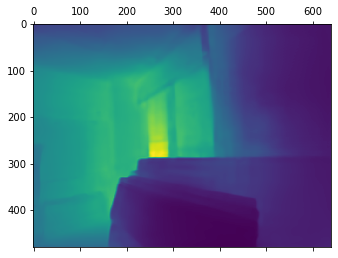

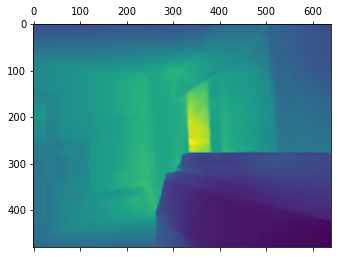

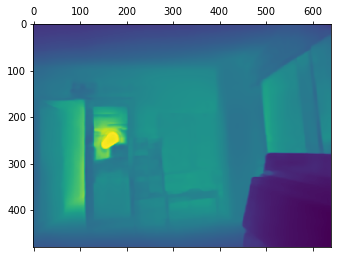

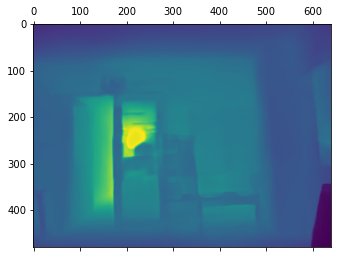

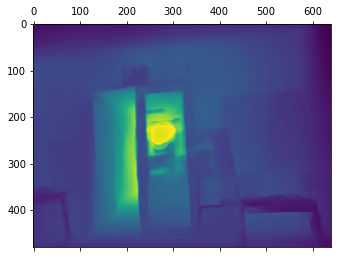

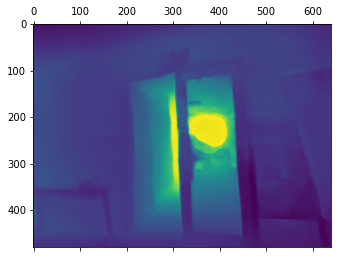

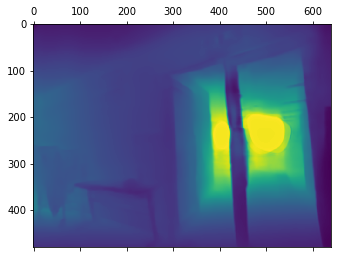

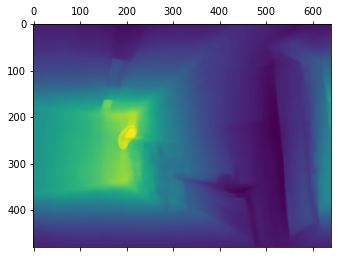

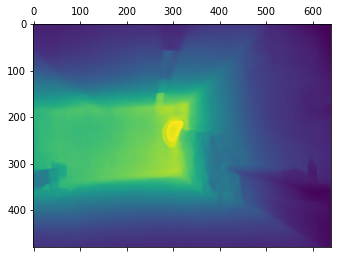

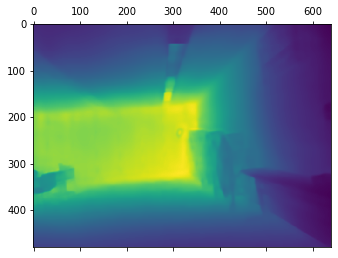

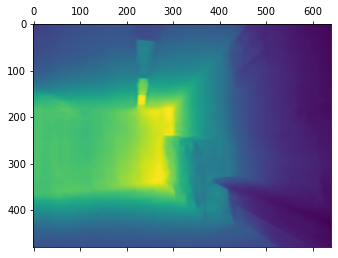

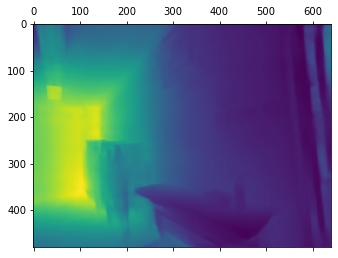

In [6]:
data="Data/ILCE_QX1_L"
newsize=(640,480)
c=1
for image in os.listdir(data):
    print("Processing image:"+str(c))
    if(image.endswith(".JPG")):
        img = Image.open(data+"/"+image)  
        #w,h=img.size
        #print("Original width:",w,",height:",h)
        img=img.resize(newsize)
        #print(img.size)
        #img.show()
        bin_centers, predicted_depth = infer_helper.predict_pil(img)
        np.savetxt("Data/depth_txt/"+image[:-4]+".txt",predicted_depth.squeeze())
        plt.matshow(predicted_depth.squeeze())
        #plt.show()
        plt.savefig("Data/depth_maps/"+image)
        img.close()
        plt.close()
        cuda.empty_cache()
        c+=1